# Plot chains

This notebook shows how to use GetDist to plot MCMC chains

In [116]:
# Imports
import sys  
sys.path.insert(0, '/Users/Pablo/Projets/covid_mcmc/')
#from SIR_model import *
from SIR_model_pl import *
from getdist.mcsamples import loadMCSamples
import getdist.plots as gdplt
from matplotlib import pyplot as plt
%matplotlib inline 

Data file not found


Load the samples

In [139]:
gdsamples2 = loadMCSamples('../chains/simple', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})
gdsamples3 = loadMCSamples('../chains/quarantine_simple', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})
gdsamples = loadMCSamples('../chains/quarantine_global', settings={'smooth_scale_2D':0.6, 'smooth_scale_1D':0.5})

Generate the plot

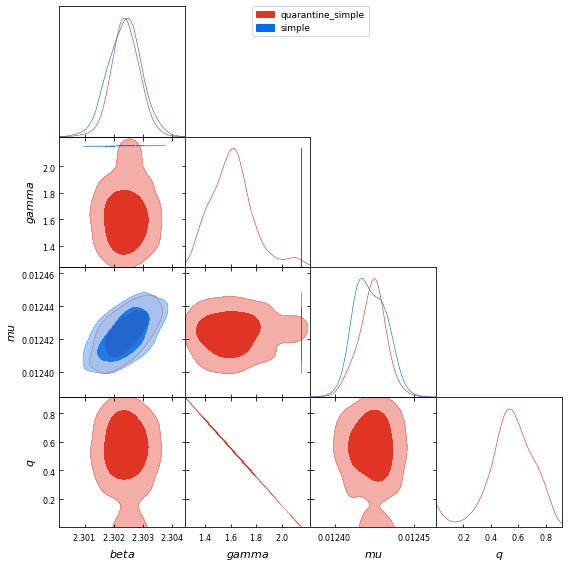

In [145]:
g = gdplt.get_subplot_plotter()
g.triangle_plot([gdsamples3, gdsamples2], ['beta', 'gamma', 'mu','q'], filled=True)

In [141]:
bestfit = gdsamples3.getParamBestFitDict(best_sample=True)
beta_bf = bestfit['beta']
gamma_bf = bestfit['gamma']
q_bf =  bestfit['q']
mu_bf =  bestfit['mu']

In [142]:
I_data, i_firstcase = read_data('../data/time_series_covid19_confirmed_global.csv', country = 'United Kingdom')
I_data = I_data[i_firstcase:]

D_data, _ = read_data('../data/time_series_covid19_deaths_global.csv', country = 'United Kingdom', undo_cumulative=False)
D_data = D_data[i_firstcase:]
D_data = np.clip(D_data, a_min = 1e-1, a_max = None)

# Correct two big outliers
#I_data[152] = I_data[151]
#I_data[153] = I_data[154]
I_data= I_data[:150]
D_data= D_data[:150]

# Total population, N.
N = 66.65*1e6 # Approximate population of the UK
# Number of days.
ndays = len(I_data)

# Initial number of infected and recovered individuals, I0 and R0.
I0, Q0, R0, D0 = I_data[0], 0, 0, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - Q0 - R0 - D0

# Each person is infected for approximately 14 days
Itot = np.zeros_like(I_data)
for i in range(ndays):
    if i<13: 
        Itot[i] = np.sum(I_data[:i+1])
    else:
        Itot[i] = np.sum(I_data[i-13:i+1])

I_data = Itot

_, I_theory, _,  _, D_theory = integrate_SIR(S0, I0, Q0, R0, D0, ndays, beta_bf, gamma_bf, q_bf, mu_bf) 

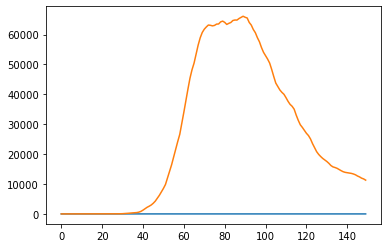

In [143]:
plt.plot(I_theory)
plt.plot(I_data)

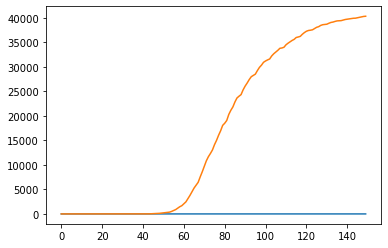

In [144]:
plt.plot(D_theory)
plt.plot(D_data)